<a href="https://colab.research.google.com/github/Vaishnavi-Peddi/DataScience/blob/main/ds_PeddiVaishnavi/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trader Behavior vs Market Sentiment Analysis
### Web3 Trading Team – Data Science Assignment

This notebook analyzes how trader behavior aligns with Bitcoin market sentiment (Fear vs Greed).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
sns.set_style('whitegrid')

## Load Datasets

In [6]:
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
trades_df = pd.read_csv('/content/historical_data.csv')

sentiment_df.head(), trades_df.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

## Convert Timestamp to Date & Time

In [9]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['date_only'] = sentiment_df['Date'].dt.date

trades_df['time'] = pd.to_datetime(trades_df['Timestamp'], unit='ms', errors='coerce')
trades_df['trade_date'] = trades_df['time'].dt.date
trades_df['trade_time'] = trades_df['time'].dt.time

trades_df[['trade_date','trade_time']].head()

,trade_date,trade_time
0,2024-10-27,03:33:20
1,2024-10-27,03:33:20
2,2024-10-27,03:33:20
3,2024-10-27,03:33:20
4,2024-10-27,03:33:20


## Data Cleaning

In [16]:
trades_df = trades_df.dropna(subset=['Closed PnL','Size Tokens','Side'])
trades_df['Side'] = trades_df['Side'].str.lower()
sentiment_df['classification'] = sentiment_df['classification'].str.capitalize()

## Merge Sentiment with Trading Data

In [14]:
merged_df = trades_df.merge(
    sentiment_df,
    left_on='trade_date',
    right_on='date_only',
    how='inner'
)

merged_df[['trade_date','classification']].head()

,trade_date,classification
0,2024-10-27,Greed
1,2024-10-27,Greed
2,2024-10-27,Greed
3,2024-10-27,Greed
4,2024-10-27,Greed


## Feature Engineering

In [17]:
merged_df['trade_result'] = np.where(merged_df['Closed PnL']>0,'Profit','Loss')
merged_df['abs_size'] = merged_df['Size Tokens'].abs()
# merged_df['high_leverage'] = merged_df['leverage'].apply(lambda x: 'High Risk' if x>=10 else 'Low Risk')

## Exploratory Data Analysis

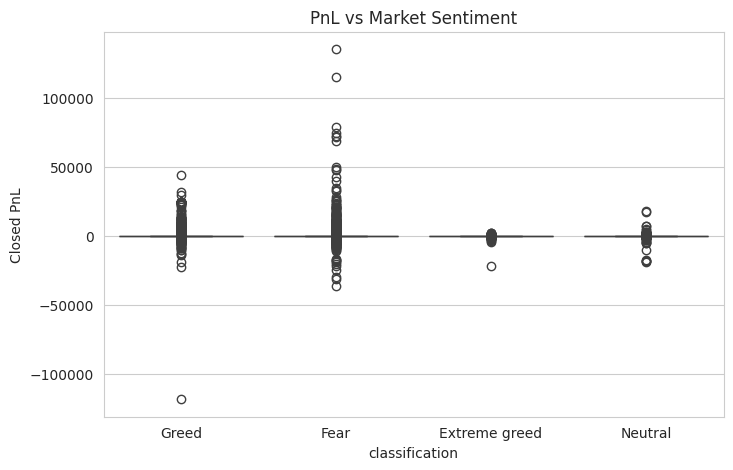

In [19]:
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('PnL vs Market Sentiment')
plt.show()

In [20]:
# sns.boxplot(x='Classification', y='leverage', data=merged_df)
# plt.title('Leverage Usage vs Sentiment')
# plt.show()

## Trader Insights

In [22]:
profit_rate = merged_df.groupby('classification')['Closed PnL'].apply(lambda x:(x>0).mean())
profit_rate

,Closed PnL
classification,
Extreme greed,0.490089
Fear,0.415146
Greed,0.446471
Neutral,0.317182


## Save Processed Data

In [24]:
merged_df.to_csv('merged_trader_sentiment_data.csv', index=False)